# About

### Labor Market Analysis






Job market changes refer to processes in which the quantity and types of jobs in an economy evolve over time. This includes shifts in the number of available jobs, the requirements for candidates, the nature of work, sectors experiencing growth or decline, as well as the skills needed to integrate into the workforce.

Changes in employment are a result of various factors influencing both the supply and demand for workers, as well as the structure of the economy and society. Key factors driving job market shifts include technological advancements, global economic changes, demographic trends, consumer behavior shifts, and more.

Data analysis on job growth and decline provides valuable insights for a range of stakeholders, including governments, businesses, and workers. Governments can use this data to plan for a certain level of unemployment and offer incentives for professional retraining. Additionally, it enables governments to focus investments and support in regions or industries that require attention. Academia can adjust its organizational structure based on future job demands, such as increasing or reducing faculty in specific fields. Businesses can identify sectors likely to face labor shortages and prepare accordingly. For citizens, this analysis is essential for choosing careers with high growth potential and avoiding sectors at risk of decline.

In conclusion, analyzing job market data is crucial for long-term planning by governments and citizens, helping to mitigate the negative impacts of unemployment.

### Market Challanges

#### Challenges in Predicting Job Market Changes

##### **Rapid Changes**
New technologies, economic crises, and pandemics (like COVID-19) can rapidly alter job demand. It is challenging to create accurate models that account for unforeseen events.

##### **Dependence on Quality and Diverse Data**
Effective predictions rely on up-to-date, accurate, and comprehensive data about the labor market. Often, data is incomplete, unsynchronized, or does not fully reflect reality.

##### **Uncertainty Around Technological Trends**
Predicting which technologies will become widespread and how they will affect the labor market is difficult. Some jobs may disappear due to automation, while new ones will emerge, but the pace of change is unpredictable.

##### **Geographical and Demographic Variability**
Trends are not uniform across regions or population groups. Analyzing averages may overlook important differences between areas or age groups.

##### **Social and Political Factors**
Regulations, legislation, and policy decisions can rapidly reshape the labor market. Predicting which regulatory or political changes will occur in the future is challenging.

##### **Characterizing New Jobs**
Newly created jobs are sometimes poorly defined at the outset. It is difficult to understand their requirements or predict how many such jobs will be created.

##### **Biases in Predictive Models**
Machine learning models can be influenced by biases in historical data. If a particular sector received less investment in the past, the model might erroneously predict that the sector will continue to decline.

#### How to Address the Challenges

##### **Diverse Data Collection**
Utilize multiple data sources (job boards, surveys, government data, etc.).
##### **Dynamic Models**
Develop flexible models that can be updated with new changes.
##### **Regional and Demographic Forecasting**
Focus on regional and demographic-specific trends, rather than only general trends.
##### **Understanding Model Limitations**
Identify and mitigate biases in predictive models.

### About our project

This project explores various machine learning classifiers using job-related data to identify whether an individual is at risk of depression. We will employ the following ML classifiers:

#### The major goals of the project



##### At a Broad Level (Governments and Public Organizations):
- Identifying trends and processes in the labor market, such as growing or declining job sectors and emerging fields.  
- Developing predictive tools to assist governments and organizations in planning economic policies, investments, and training programs.  
- Enhancing alignment between labor market demands and the available workforce supply.  


##### At an Individual Level (Workers and Students):
- Matching professions to the knowledge, skills, and experience of job seekers.  
- Recommending fields of study that can improve the likelihood of entering the labor market successfully.  
- Providing personalized insights to users based on their interests and personal data.






#### About the Datasets


The dataset used in this analysis is derived from the Current Population Survey (CPS), which is a monthly survey conducted by the U.S. Bureau of Labor Statistics (BLS) in collaboration with the U.S. Census Bureau. The CPS is one of the primary sources of labor force statistics in the United States, providing detailed information about the employment status of the civilian noninstitutional population.

The Bureau of Labor Statistics (BLS) is an agency of the United States Department of Labor. It is the principal fact-finding agency in the broad field of labor economics and statistics and serves as part of the U.S. Federal Statistical System. BLS collects, calculates, analyzes, and publishes data essential to the public, employers, researchers, and government organizations.

The CPS collects data through interviews with a representative sample of households across the United States. The survey covers various demographic groups and collects information on a wide range of topics, including employment, unemployment, earnings, and occupation. Each month, approximately 60,000 households are surveyed, and the data collected helps to provide insights into the nation's labor market trends.

The information gathered from the CPS is widely used by policymakers, economists, and researchers to analyze labor market conditions, track employment trends, and inform decisions related to economic policies. The data is also used to estimate various labor force indicators, such as the unemployment rate, participation rate, and employment-to-population ratio.

sources:



*   https://www.bls.gov/ - U.S. Bureau of Labor Statistics
*   https://catalog.data.gov/dataset - The Home of the U.S. Government's Open Data
*   https://www.kaggle.com/datasets/PromptCloudHQ/us-jobs-on-monstercom
*   https://www.bls.gov/cps/tables.htm

#### Problem the Project Aims to Solve

Unemployment and labor market mismatch. Job market data analysis can identify growing fields, skill demand trends, and future professions, offering recommendations to workers on required training or career transitions.

# SetUp

###### Imports

In [13]:
import os
os.environ["OMP_NUM_THREADS"] = "5"

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



###### Path consts

In [19]:
ON_NOTEBOOK = False
TABLES_DIR_PATH = '/content/sample_data' if ON_NOTEBOOK else './data/data_sources'
NY_JOB_POSTINGS = f'{TABLES_DIR_PATH}/Jobs/ny_job_postings.csv'
EMPLOYED_PATH = f'{TABLES_DIR_PATH}/Employed'
OCCUPATIONS_PATH = f'{TABLES_DIR_PATH}/Occupations'

# Main

## Occupations over time

### Data description and loading


The dataset consists of 27 tables from the U.S. Bureau of Labor Statistics, providing employment data by detailed occupation, sex, race, and Hispanic or Latino ethnicity. These tables cover the years 1995 to 2023, excluding the years 2000-2001, which are missing from the dataset for some reason.
Each year has a separate table containing this data.

These tables serve as the foundation for our analysis, and we will be consolidating them to create a unified dataset that tracks the number of employed individuals by occupation across the years. The goal is to analyze employment trends and identify any significant patterns in the data.

Let's look at two example tables:

In [20]:
print("Data from 2023:\n")
df_2023 = pd.read_excel(f"{EMPLOYED_PATH}/cpsaat11b_2023.xlsx")
df_2023.dropna().head()

Data from 2023:



,Occupation,Total employed,Women,White,Black or\nAfrican\nAmerican,Asian,Hispanic\nor Latino
1,"Total, 16 years and over",161037.0,46.9,76.5,12.8,6.9,18.8
3,"Management, professional, and related occupations",70275.0,51.8,76.9,10.6,9.3,11.2
4,"Management, business, and financial operations...",30544.0,45.7,79.7,9.8,7.5,11.8
5,Management occupations,20906.0,41.9,80.9,9.2,7,12.1
6,Chief executives,1780.0,30.6,85.8,5.2,7.3,6.3


In [ ]:
df_2023.shape

(601, 7)

In the table above, the employment data is organized by the age of the employee and the occupation in which they are employed.

Please note that the numerical data is in thousands

In [21]:
print("Data from 2005:\n")
df_2005 = pd.read_excel(f"{EMPLOYED_PATH}\cpsaat11b_2005.xlsx")
df_2005.dropna().head()

Data from 2005:



FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Employed\\cpsaat11b_2005.xlsx'

In [ ]:
df_2005.shape

(340, 6)

The table above is organized by gender and race, along with the occupations in which individuals are employed.

### Data Processing and Integration Explanation:



In this task, we will process and integrate data from multiple tables, each corresponding to a different year, into a single consolidated table. The goal is to create a unified dataset that contains the total number of employees for each occupation across different years.

At this stage, the focus is on the total number of employees per occupation, and factors such as age or race will not be considered. If an occupation is missing data for a particular year, we will leave the corresponding entry empty (i.e., a NaN value) for that year.

The purpose of this integration is to facilitate efficient analysis of the data by creating a unified table. This will allow us to compare and analyze employment trends across different years, focusing on total employment numbers for each occupation.

In [24]:
# Define the folder path containing the Excel files
folder_path = EMPLOYED_PATH

# List to store processed data from each file
all_data = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("cpsaat11b_") and filename.endswith(".xlsx"):
        file_path = os.path.join(folder_path, filename)

        # Extract the year from the filename
        year = filename.split("_")[-1].split(".")[0]

        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)

        # Check if required columns exist in the DataFrame
        if 'Occupation' in df.columns and 'Total employed' in df.columns:
            df_filtered = df[['Occupation', 'Total employed']].copy()

            # Remove empty rows
            df_filtered.dropna(inplace=True)

            # Convert 'Total employed' to float (removing commas)
            df_filtered['Total employed'] = df_filtered['Total employed'].astype(str).str.replace(',', '')
            df_filtered['Total employed'] = pd.to_numeric(df_filtered['Total employed'], errors='coerce')

            # Add a new column for the year
            df_filtered['Year'] = int(year)  # Convert year to integer

            # Append the processed DataFrame to the list
            all_data.append(df_filtered)

# Concatenate all processed data into a single DataFrame
final_df = pd.concat(all_data, ignore_index=True)

# Create a pivot table to organize data by occupation and year
pivot_table = final_df.pivot_table(
    index='Occupation',
    columns='Year',
    values='Total employed',
    aggfunc='first'
)
#pivot_table.reset_index(inplace=True)
# Ensure all values are float
pivot_table = pivot_table.astype(float)

# Save the cleaned dataset
#pivot_table.to_csv("aggregated_employment_data.csv")

pivot_table.head()

Year,2023
Occupation,
Accountants and auditors,1624.0
Actors,50.0
Actuaries,43.0
Acupuncturists,27.0
Adhesive bonding machine operators and tenders,10.0


It is important to note that there are missing data points for certain occupations in specific years. This could be due to various reasons, such as difficulties in collecting data during those years or the introduction of new occupations that were not included in the earlier datasets. Once we analyze the data, we will be able to make informed assumptions and hypotheses about the reasons behind these gaps.

In [ ]:
final_df.describe()

,Total employed,Year
count,13011.000000,13011.000000
mean,1316.378833,2011.292445
std,7637.439416,7.974258
min,0.000000,1995.000000
25%,46.000000,2006.000000
50%,134.000000,2012.000000
75%,454.000000,2018.000000
max,161037.000000,2023.000000


Total Employed:

The average number of employed individuals is 1,316, with a high standard deviation (7,637), indicating significant variation across observations.
The distribution is highly skewed, with a median of 134 and a maximum of 161,037, suggesting the presence of extreme outliers.
A minimum value of 0 indicates instances with no recorded employment, which may require further investigation.

Year:

The dataset covers a period from 1995 to 2023, with a mean year of 2011.
The interquartile range (IQR) suggests that 75% of the data is from 2018 or earlier, while the most recent observations reach 2023.



### EDA target


In this analysis, we visualize the employment trends for different job positions over time. The data is cleaned and transformed to ensure it is in a suitable format for analysis. We then plot a line for each job position, showing how the number of employees in that position changes year by year. The graph is designed to clearly highlight the shifts in employment across multiple positions, with a legend placed below the plot to ensure clarity. This approach helps in understanding long-term employment trends and identifying patterns or anomalies in job market changes.
The data shows that there are many missing values in the table, and for some years, there is no available information on the number of employees for certain job positions. One possible way to overcome this gap is by clustering similar job positions within the same field. This approach would allow us to analyze trends in employment numbers on a broader scale, identifying increases or decreases in workforce demand within general job categories rather than specific roles.

### Models

#### Clustering

##### Task Description

We are facing a challenge with job data as we lack additional information that could serve as an indicator for performing clustering. Therefore, we will utilize an NLP-based approach combining **Embeddings + Clustering**. Specifically, we will convert job titles into numerical vectors using word embeddings techniques such as **Word2Vec, BERT, or OpenAI Embeddings**. Subsequently, we will apply clustering methods like **K-Means, Hierarchical, or DBSCAN** on these vectors.  

Advantages of this approach are identifies hidden relationships between professions, even if the job titles are not identical and particularly effective for labor market analysis, as it enables understanding of similarities (e.g., recognizing that "Data Scientist" is closely related to "Machine Learning Engineer").

##### Models

###### Create Embedings

In [ ]:
occupations = pivot_table.index.dropna().unique().tolist()
model = SentenceTransformer("all-MiniLM-L6-v2")
occupation_embeddings = model.encode(occupations, convert_to_tensor=True).cpu().numpy()

###### K-means

####### **Chossing the k**




We do not know the optimal K value for the `K-Means` model. Therefore, we will estimate it using the Silhouette Score, a metric that evaluates how well the clusters formed by the clustering algorithm perform. The metric measures how close each point is to its assigned cluster and how far it is from the nearest neighboring cluster.


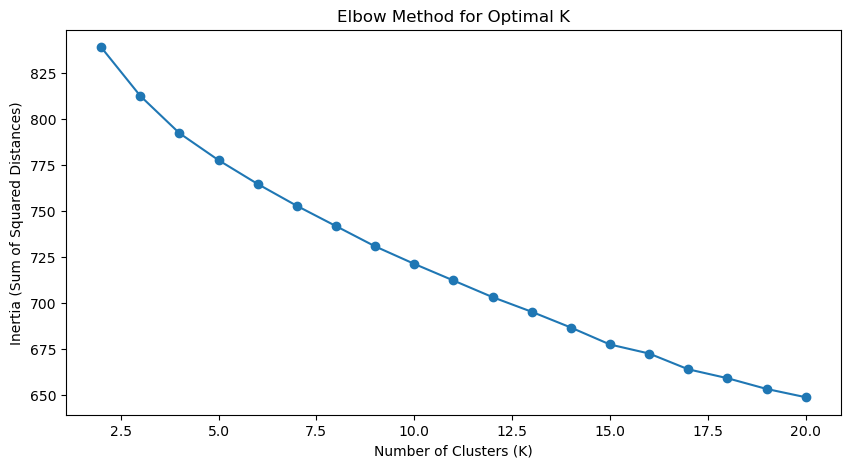

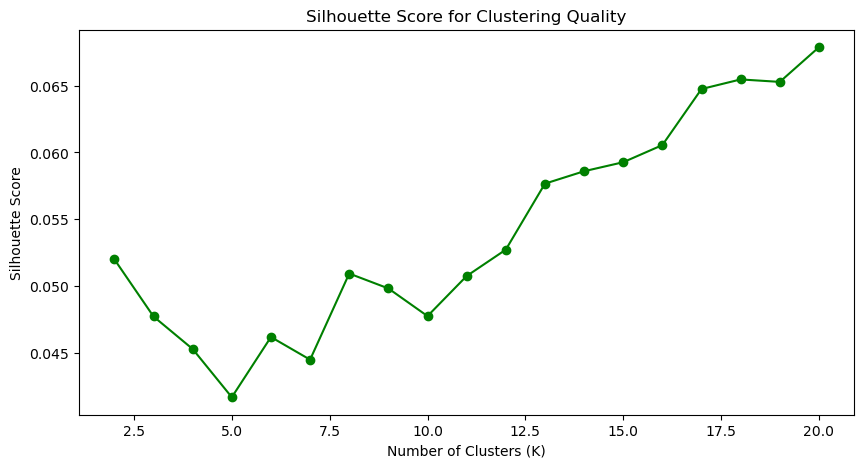

Optimal number of clusters: 20


In [ ]:
inertia = []
silhouette_scores = []
K_range = range(2, 21)  # Testing K values from 2 to 20

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    labels = kmeans.fit_predict(occupation_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(occupation_embeddings, labels))

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker="o", color="green")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Clustering Quality")
plt.show()

optimal_K = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_K}")

####### **Running K-means**

We have determined that the optimal number of clusters for `K-Means` is **20**. Now, we will proceed with running the `K-Means` algorithm using **K=20** to segment the data accordingly.

In [ ]:

kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
labels = kmeans.fit_predict(occupation_embeddings)
clusters_df = pd.DataFrame({"Occupation": occupations, "Cluster": labels})

To assign meaningful names to the clusters based on professional domains, we will utilize Natural Language Processing (NLP) and clustering techniques to generate automated labels. Job titles will be preprocessed to remove stopwords and generic terms such as "Workers" to ensure clarity and relevance. The `Counter` function from the `collections` module will be used to analyze the frequency of job titles within each cluster, identifying the most commonly occurring terms. Cluster names will be determined based on these dominant terms, ensuring that the labels accurately represent the core characteristics of each professional category.

In [ ]:

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
custom_stopwords = {word.lower() for word in {"Workers", "Staff", "Employees", "Employee", "And", "Of", "The",
                                              "In", "On", "For", "With", "Occupations", "Operators", "Attendants",
                                              "Except", "Related", "Supervisors"}}

def clean_word(word):
    """
    Cleans a word by stripping spaces, converting to lowercase, and removing punctuation.
    """
    return re.sub(r'[^\w\s]', '', word).strip().lower()

def get_cluster_name(cluster_data):
    """
    Generates a clean name for the cluster based on frequent words in occupations.
    Converts words to lowercase for uniform processing and ensures proper capitalization in output.
    """
    words = " ".join(cluster_data["Occupation"]).split()

    cleaned_words = [clean_word(word) for word in words]
    filtered_words = [word for word in cleaned_words if word not in stop_words and word not in custom_stopwords]
    common_words = [word for word, count in Counter(filtered_words).most_common(3)]
    unique_words = []
    for word in common_words:
        if word not in unique_words:
            unique_words.append(word)

    formatted_name = " / ".join(word.capitalize() for word in unique_words)
    return formatted_name if formatted_name else "Miscellaneous"


cluster_names = {}
used_names = set()

for cluster_num in range(optimal_K):
    name = get_cluster_name(clusters_df[clusters_df["Cluster"] == cluster_num])
    original_name = name
    count = 1
    while name in used_names:
        name = f"{original_name} ({count})"
        count += 1

    cluster_names[cluster_num] = name
    used_names.add(name)

clusters_df["Cluster Name"] = clusters_df["Cluster"].map(cluster_names)

print("\nFinal Cluster Names:")
for cluster_num, name in cluster_names.items():
    print(f" Cluster {cluster_num}: {name}")


Final Cluster Names:
 Cluster 0: Inspectors / Testers / Samplers
 Cluster 1: Engineers / Scientists / Computer
 Cluster 2: Maintenance / Construction / Production
 Cluster 3: Firstline / Supervisorsmanagers / Service
 Cluster 4: Service / Social / Community
 Cluster 5: Transportation / Drivers / Truck
 Cluster 6: Teachers / Therapists / Counselors
 Cluster 7: Food / Agricultural / Preparation
 Cluster 8: Sales / Representatives / Services
 Cluster 9: Repairers / Installers / Equipment
 Cluster 10: Tenders / Machine / Setters
 Cluster 11: Officers / Investigators / Financial
 Cluster 12: Machine / Equipment / Computer
 Cluster 13: Managers / Administrative / Relations
 Cluster 14: Designers / Directors / Architects
 Cluster 15: Clerks / Information / Mail
 Cluster 16: Assistants / Medical / Physicians
 Cluster 17: Technicians / Technologists / Medical
 Cluster 18: Recreation / Religious / Sports
 Cluster 19: Analysts / Specialists / Computer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etamari1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's examine which professions have been assigned to each cluster.

In [ ]:
for cluster_num in range(optimal_K):
    print(f"\n Cluster {cluster_num} ({cluster_names[cluster_num]}):")
    print(clusters_df[clusters_df["Cluster"] == cluster_num]["Occupation"].tolist())


 Cluster 0 (Inspectors / Testers / Samplers):
['Agricultural inspectors', 'Appraisers and assessors of real estate', 'Construction and building inspectors', 'Construction inspectors', 'Fire inspectors', 'Garbage collectors', 'Inspectors, testers, and graders', 'Inspectors, testers, sorters, samplers, and weighers', 'Meter readers', 'Meter readers, utilities', 'Paperhangers', 'Precision inspectors, testers, and related workers', 'Production inspectors, checkers, and examiners', 'Production inspectors, testers, samplers, and weighers', 'Production testers', 'Proofreaders and copy markers', 'Property appraisers and assessors', 'Refuse and recyclable material collectors', 'Surveyors, cartographers, and photogrammetrists', 'Weighers, measurers, and checkers and samplers', 'Weighers, measurers, checkers, and samplers, recordkeeping', 'Weighers, measurers, checkers, and samplers, recordkeeping.']

 Cluster 1 (Engineers / Scientists / Computer):
['Aerospace engineers', 'Agricultural engineers

The following graph illustrates the distribution of professions across the clusters.

C:\Users\etamari1\AppData\Local\Temp\ipykernel_34204\2953754240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clusters_df["Cluster"], palette="viridis")


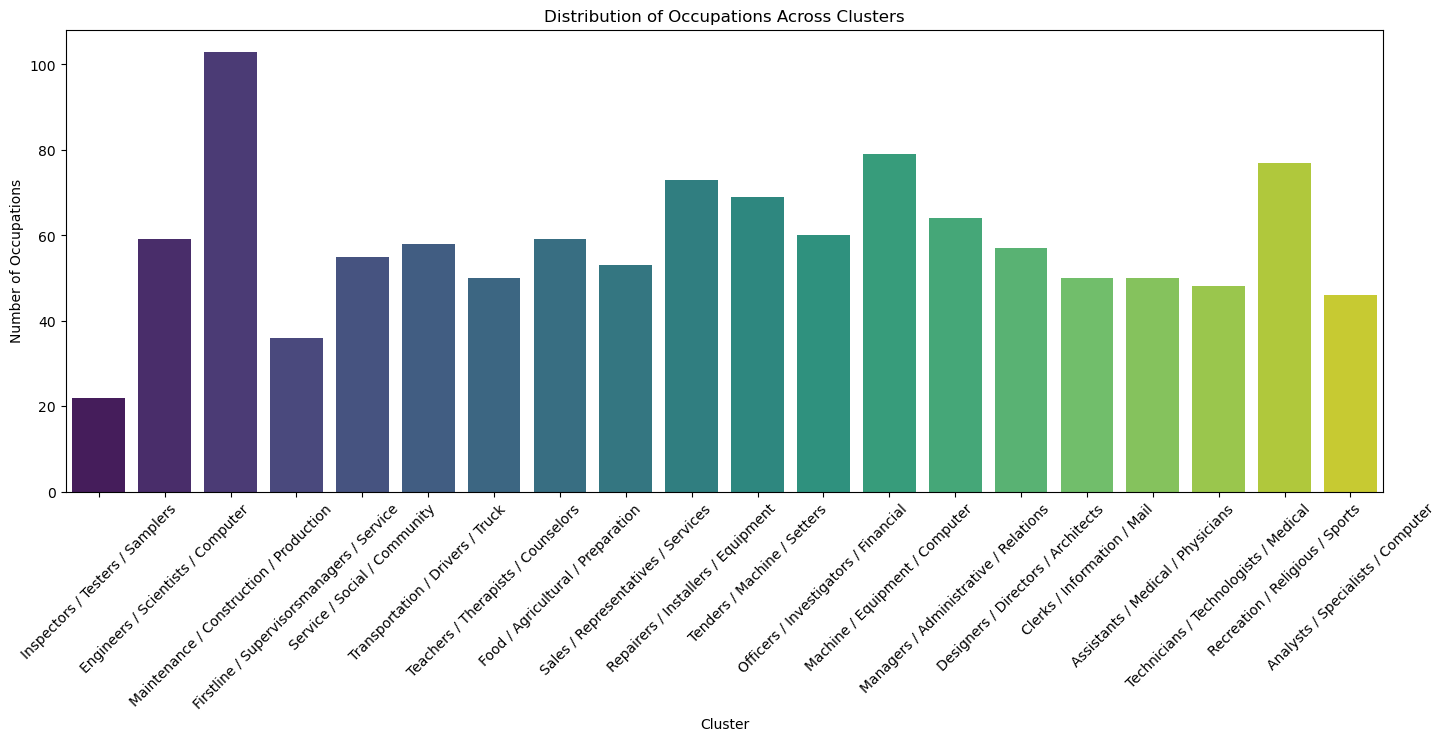

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(x=clusters_df["Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Occupations")
plt.title("Distribution of Occupations Across Clusters")
plt.xticks(ticks=range(optimal_K), labels=[cluster_names[i] for i in range(optimal_K)], rotation=45)
plt.show()

We will create an additional column in the table that assigns each job to the cluster it belongs to. This will allow us to analyze the data more easily.

In [ ]:

pivot_table_with_clusters = pivot_table.copy()
pivot_table_with_clusters["Cluster"] = pivot_table_with_clusters.index.map(
    clusters_df.set_index("Occupation")["Cluster"]
)
pivot_table_with_clusters.head()

# Save to CSV if needed
#pivot_table_with_clusters.to_csv("pivot_table_with_clusters.csv", index=True)


Year,1995,1996,1997,1998,1999,2002,2003,2004,2005,2006,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Cluster
Occupation,,,,,,,,,,,,,,,,,,,,,
Accountants and auditors,1526.0,1538.0,1625.0,1616.0,1658.0,1702.0,1639.0,1723.0,1683.0,1779.0,...,1732.0,1777.0,1804.0,1929.0,1964.0,1696.0,1630.0,1652.0,1624.0,11
Actors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.0,47.0,40.0,36.0,40.0,29.0,45.0,56.0,50.0,14
Actors and directors,114.0,136.0,136.0,130.0,129.0,155.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
Actuaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,14.0,29.0,33.0,33.0,32.0,29.0,30.0,43.0,11
Acupuncturists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.0,24.0,28.0,27.0,16


A two-dimensional visualization will be generated to depict the distribution of job positions across the clusters, which may help us understand how the module categorized the data into clusters

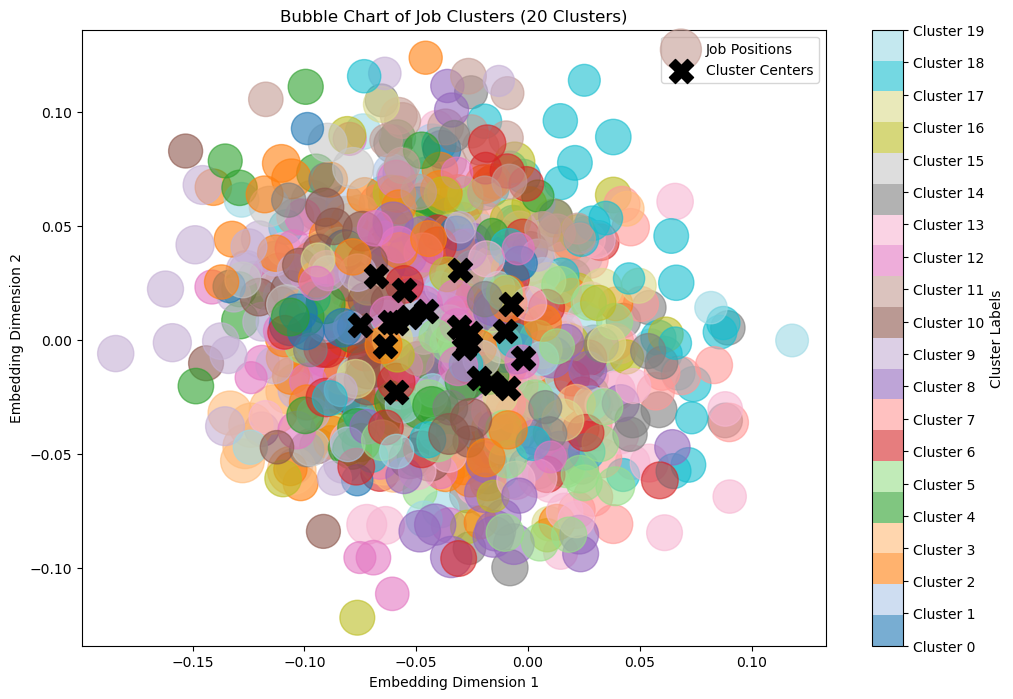

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure the variable `optimal_K` is defined
if 'optimal_K' not in globals():
    print("Recomputing optimal_K using the Elbow Method and Silhouette Score...")

    # Define range for K
    K_range = range(2, 21)
    inertia = []
    silhouette_scores = []

    # Compute K-Means for different cluster sizes
    for K in K_range:
        kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
        labels = kmeans.fit_predict(occupation_embeddings)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(occupation_embeddings, labels))

    # Find the best K
    optimal_K = 20  # Set to 20 explicitly
    print(f"Number of clusters set to: {optimal_K}")

# Perform K-Means clustering with 20 clusters
kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(occupation_embeddings)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate distances of occupations to their assigned cluster centers
distances = np.min(cdist(occupation_embeddings, cluster_centers, metric='euclidean'), axis=1)

# Normalize distances for bubble sizes
bubble_sizes = (1 / (distances + 1e-5)) * 500  # Prevent division by zero and scale

# Create the scatter plot (bubble chart)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    occupation_embeddings[:, 0], occupation_embeddings[:, 1],
    c=cluster_labels, cmap='tab20', alpha=0.6, s=bubble_sizes, label="Job Positions"
)

# Plot cluster centers as larger markers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='black', marker='X', s=300, label='Cluster Centers')

# Add colorbar as a legend
cbar = plt.colorbar(scatter, ticks=range(optimal_K))
cbar.set_label("Cluster Labels")
cbar.set_ticks(range(optimal_K))
cbar.set_ticklabels([f"Cluster {i}" for i in range(optimal_K)])

# Add labels and title
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.title("Bubble Chart of Job Clusters (20 Clusters)")
plt.legend()
plt.show()


It is evident that the points in the graph appear scattered, and the clusters were assigned in a seemingly random manner. To gain a deeper understanding of the model’s clustering logic, we will generate a 3D visualization and examine whether the clustering assignments exhibit a meaningful structure.

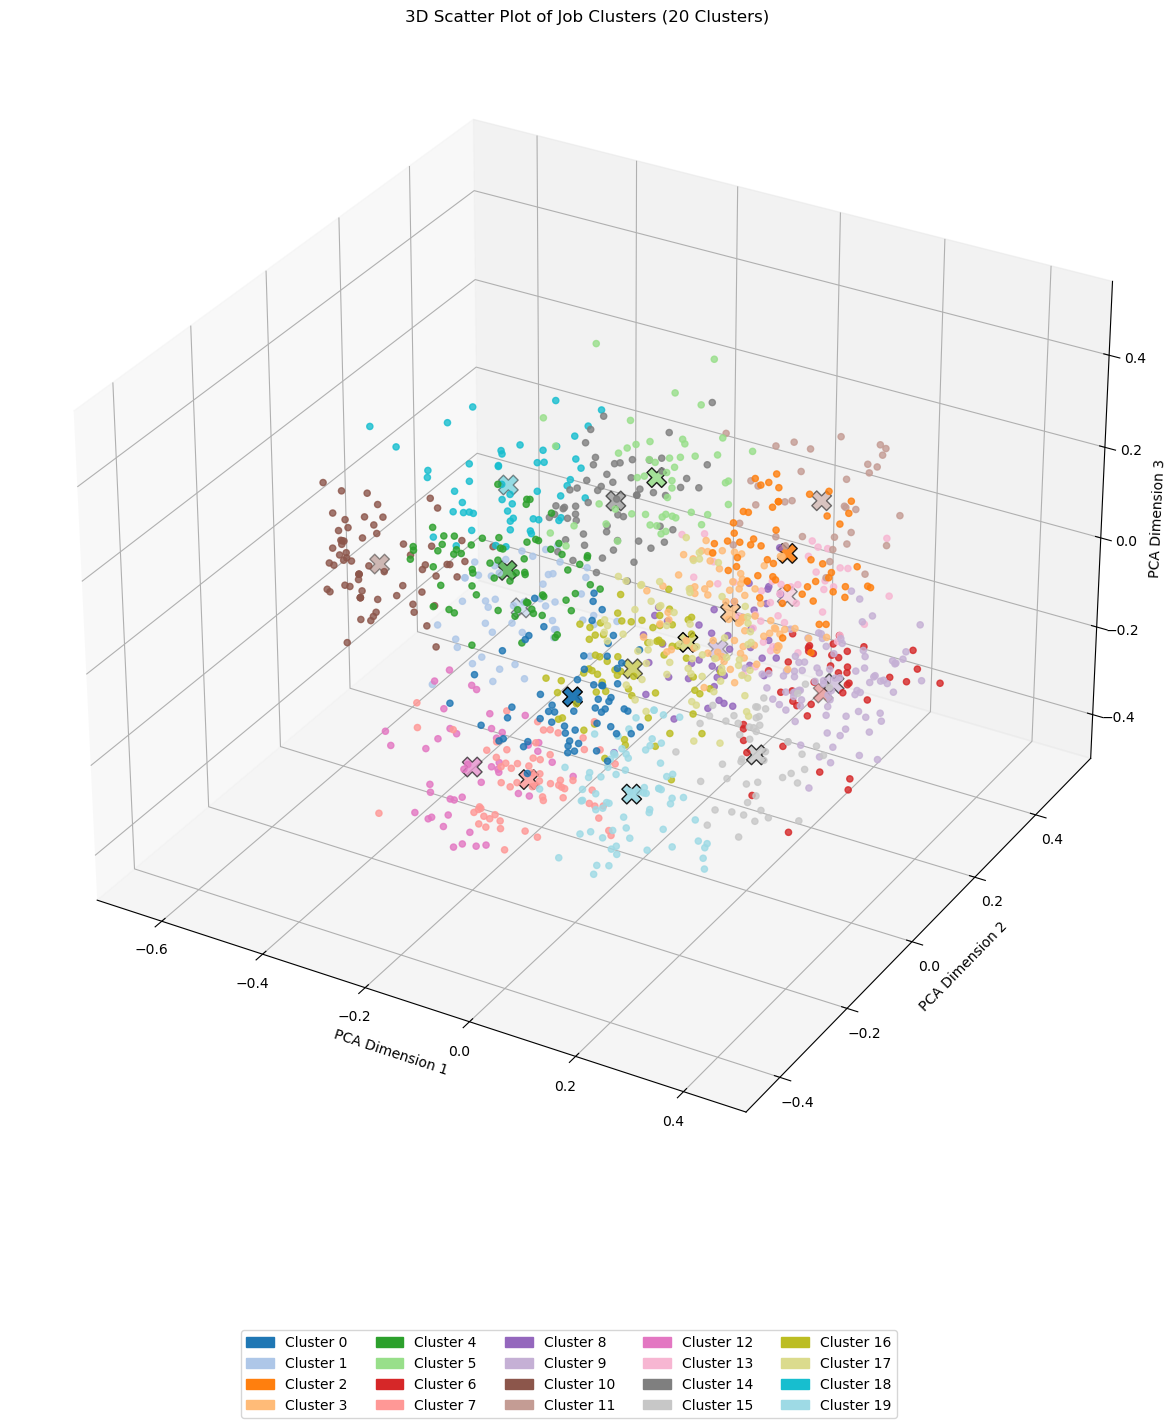

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.patches as mpatches

# Ensure pivot_table is available and contains occupation data
occupations = pivot_table.index.dropna().unique().tolist()

# Load the Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert occupation names into numerical vector representations (embeddings)
occupation_embeddings = model.encode(occupations, convert_to_tensor=True).cpu().numpy()

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
occupation_embeddings_3D = pca.fit_transform(occupation_embeddings)

# Set number of clusters to 20 explicitly
optimal_K = 20

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(occupation_embeddings_3D)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a 3D scatter plot with colored points based on clusters
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for job positions as points colored by their cluster
scatter = ax.scatter(
    occupation_embeddings_3D[:, 0], occupation_embeddings_3D[:, 1], occupation_embeddings_3D[:, 2],
    c=cluster_labels, cmap='tab20', alpha=0.8, s=20
)

# Scatter plot for cluster centers with larger markers and distinct colors
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2],
           c=range(optimal_K), cmap='tab20', marker='X', s=200, edgecolors='black')

# Add labels and title
ax.set_xlabel("PCA Dimension 1")
ax.set_ylabel("PCA Dimension 2")
ax.set_zlabel("PCA Dimension 3")
ax.set_title("3D Scatter Plot of Job Clusters (20 Clusters)")

# Create a legend manually and place it at the bottom
legend_patches = [mpatches.Patch(color=plt.cm.tab20(i / optimal_K), label=f'Cluster {i}') for i in range(optimal_K)]
fig.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)

plt.show()


In the 3D Scatter Plot we generated, the X, Y, and Z axes represent the three new dimensions derived through **Principal Component Analysis (PCA)**. These axes do not have a direct real-world meaning but are artificially selected to capture the maximum variance from the original data, which consists of the **embedding vectors of job titles**.  

The axes serve as principal directions in the data, illustrating where groups of similar professions are located in relation to one another. The closer two professions appear in the graph, the more similar they are in their embeddings. Conversely, a profession that appears distant from others is likely to be relatively unique compared to the rest. This visualization helps distinguish between professions based on their underlying semantic similarities within the embedding space.

We will create a graph that illustrates the trends of increase and decrease in various fields over the years.

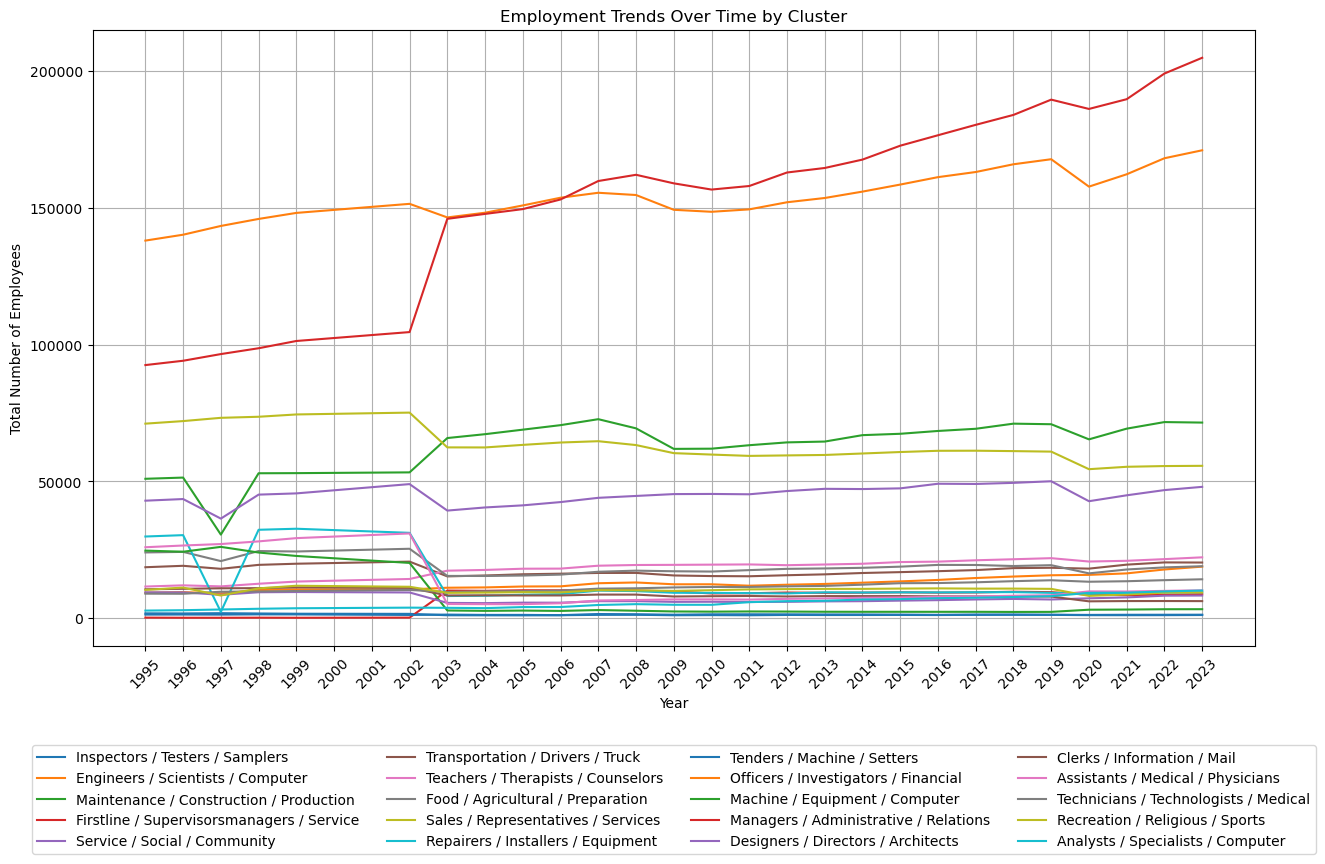

In [ ]:
# Melt the DataFrame to long format for easier plotting
df_long = pivot_table_with_clusters.reset_index().melt(id_vars=["Occupation", "Cluster"], var_name="Year", value_name="Total Employed")

# Convert 'Year' to numeric and drop NaN values
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce')
df_long = df_long.dropna(subset=["Total Employed"])

# Group by Year and Cluster to sum the total employed per cluster per year
cluster_trend = df_long.groupby(["Year", "Cluster"])["Total Employed"].sum().reset_index()

# Plot trends for each cluster
plt.figure(figsize=(15, 8))
for cluster in cluster_trend["Cluster"].unique():
    cluster_data = cluster_trend[cluster_trend["Cluster"] == cluster]
    plt.plot(cluster_data["Year"], cluster_data["Total Employed"], label=cluster_names[cluster])  # Use cluster names

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Total Number of Employees")
plt.title("Employment Trends Over Time by Cluster")

# Set x-axis to show all years from 1995 to 2023
plt.xticks(ticks=range(1995, 2024), rotation=45)

# Move legend to the bottom
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10)

plt.grid(True)
plt.show()


We will extract from the graph the six job positions that have experienced the most significant changes over the years.

In [ ]:
# Recalculate the employment changes for 1995-2023

# Melt the DataFrame to long format for easier analysis
df_long = pivot_table_with_clusters.reset_index().melt(id_vars=["Occupation", "Cluster"], var_name="Year", value_name="Total Employed")

# Convert 'Year' to numeric and drop NaN values
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce')
df_long = df_long.dropna(subset=["Total Employed"])

# Group by Year and Cluster to sum the total employed per cluster per year
cluster_trend = df_long.groupby(["Year", "Cluster"])["Total Employed"].sum().reset_index()

# Get employment numbers for 1995 and 2023 for each cluster
employment_1995 = cluster_trend[cluster_trend["Year"] == 1995].set_index("Cluster")["Total Employed"]
employment_2023 = cluster_trend[cluster_trend["Year"] == 2023].set_index("Cluster")["Total Employed"]

# Calculate the change in employment from 1995 to 2023
employment_change = (employment_2023 - employment_1995).dropna().sort_values(ascending=False)

# Get the top 3 clusters with the highest increase and highest decrease
top_3_increase = employment_change.head(3)
top_3_decrease = employment_change.tail(3)

# Convert indices to cluster names
top_3_increase.index = top_3_increase.index.map(cluster_names)
top_3_decrease.index = top_3_decrease.index.map(cluster_names)

# Print results without extra information
print("Top 3 Clusters with Highest Increase in Employment (1995-2023):")
for cluster, value in top_3_increase.items():
    print(f"{cluster}: {int(value)}")

print("\nTop 3 Clusters with Highest Decrease in Employment (1995-2023):")
for cluster, value in top_3_decrease.items():
    print(f"{cluster}: {int(value)}")


Top 3 Clusters with Highest Increase in Employment (1995-2023):
Managers / Administrative / Relations: 112321
Officers / Investigators / Financial: 33010
Maintenance / Construction / Production: 20545

Top 3 Clusters with Highest Decrease in Employment (1995-2023):
Assistants / Medical / Physicians: -15744
Repairers / Installers / Equipment: -20356
Machine / Equipment / Computer: -21414



#### Predicting The Future


##### Task description

We will employ various predictive models to forecast the number of job positions in the labor market over the next 20 years.

##### Models

###### Linear Regression

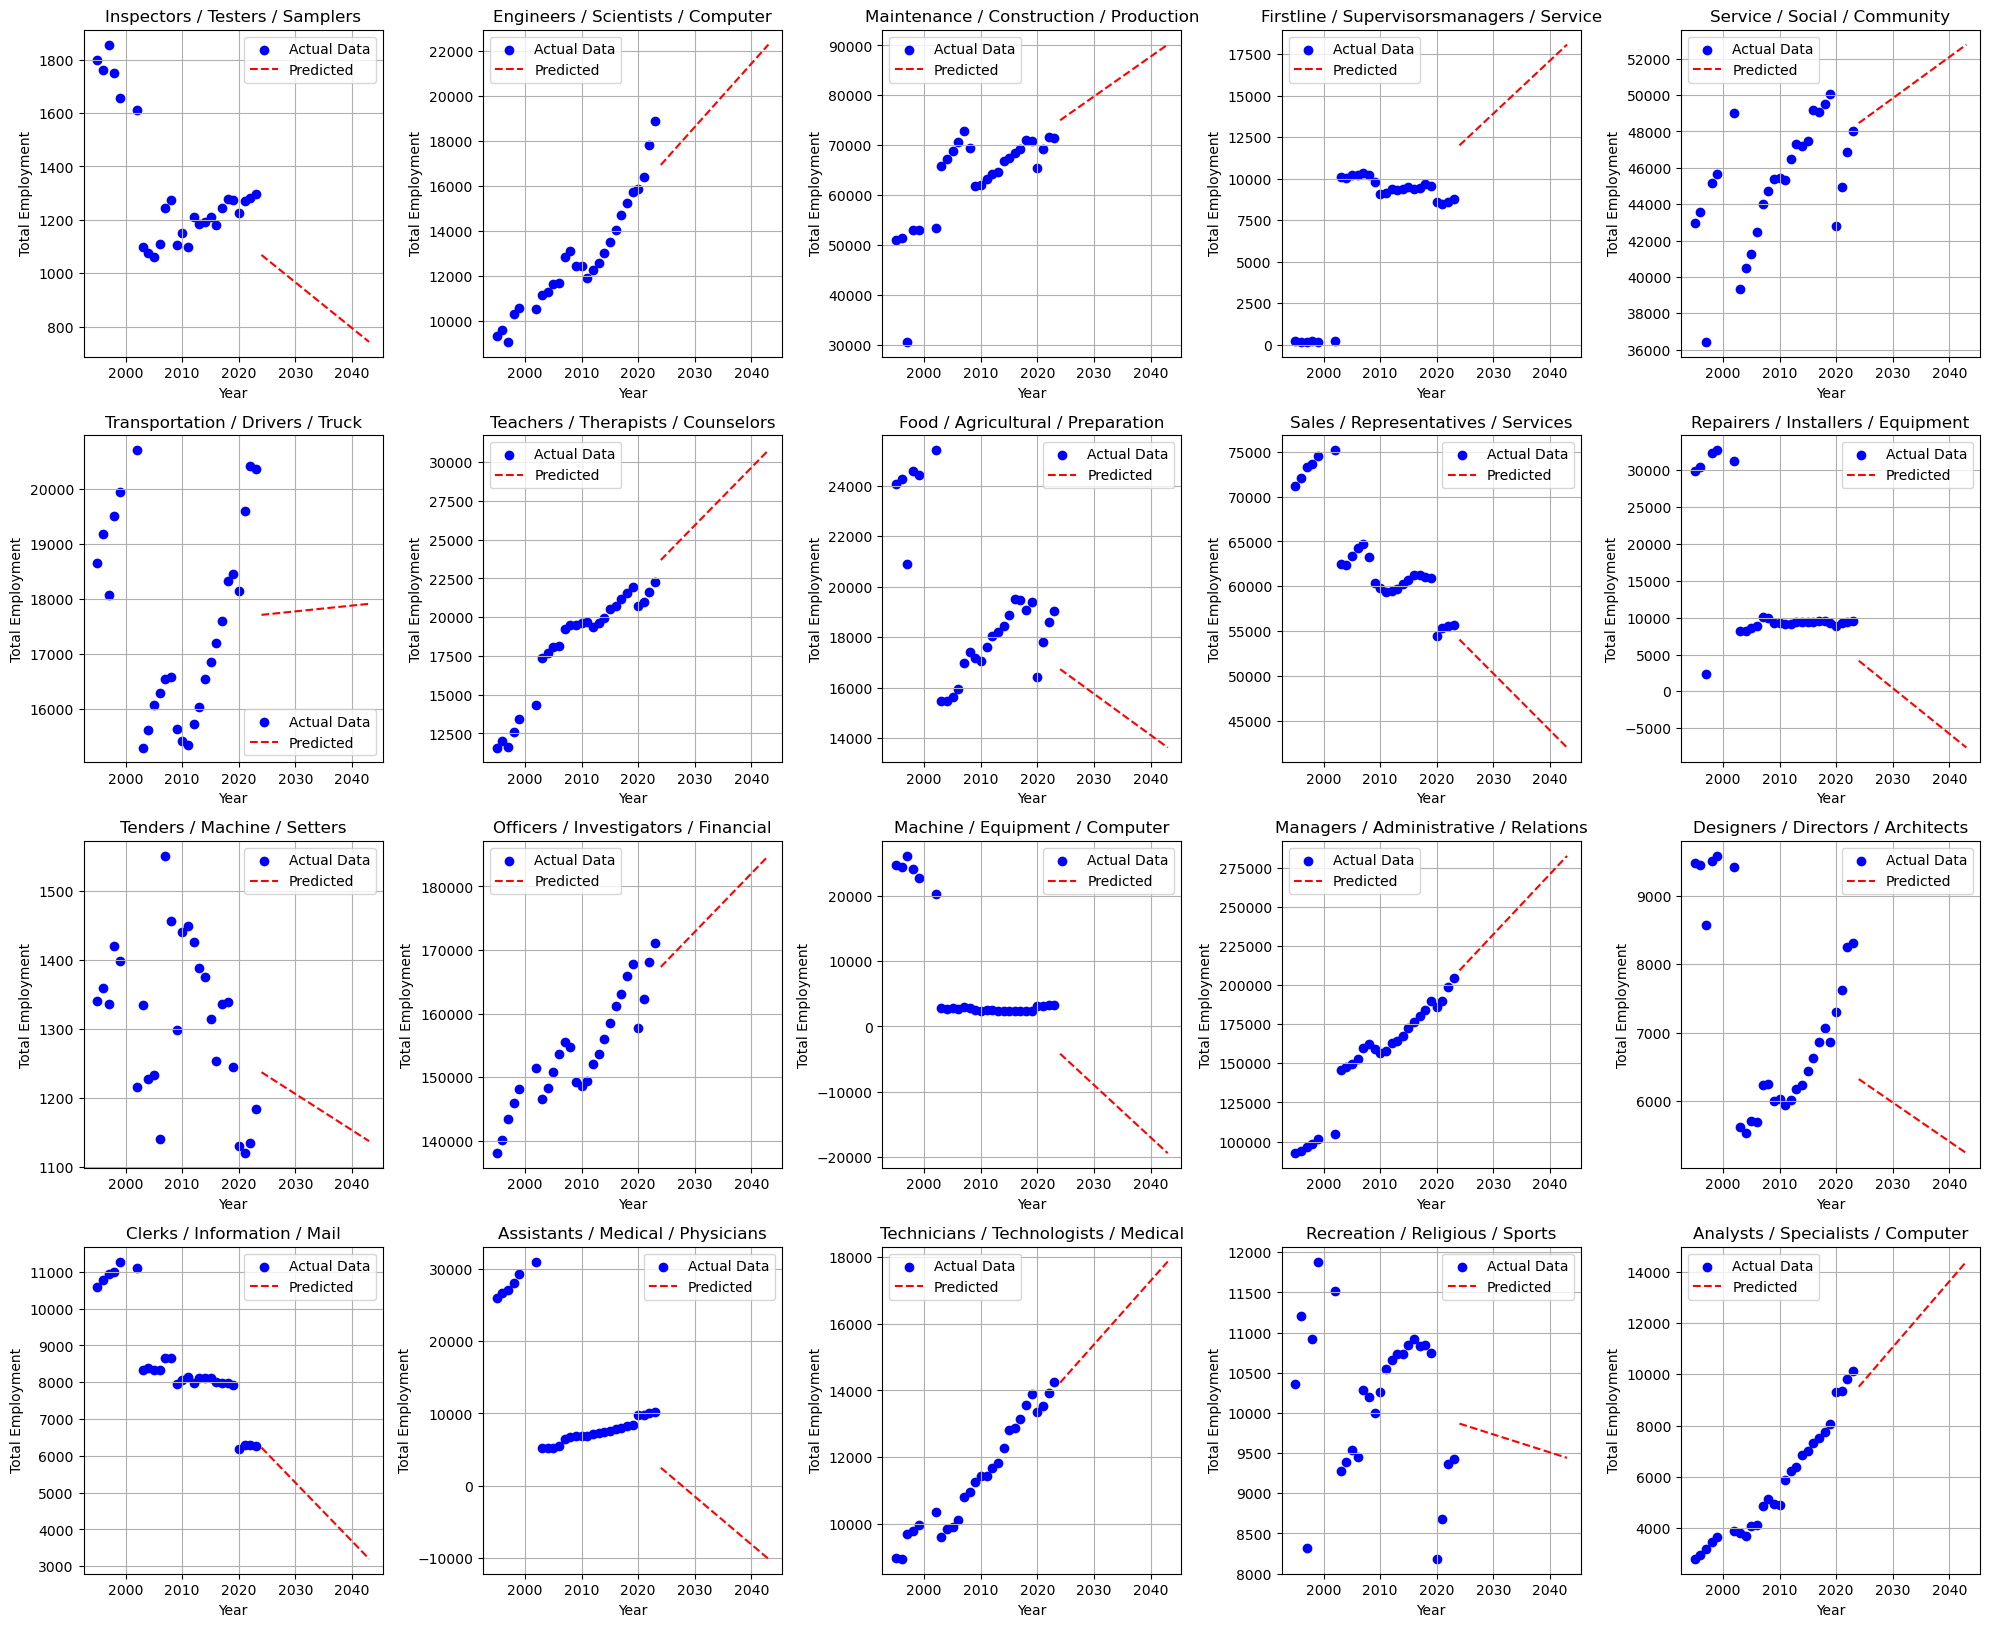

In [ ]:
# Melt the DataFrame to long format for easier analysis
df_long = pivot_table_with_clusters.reset_index().melt(id_vars=["Occupation", "Cluster"], var_name="Year", value_name="Total Employed")

# Convert 'Year' to numeric and drop NaN values
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce')
df_long = df_long.dropna(subset=["Total Employed"])

# Group by Year and Cluster to sum the total employed per cluster per year
cluster_trend = df_long.groupby(["Year", "Cluster"])["Total Employed"].sum().reset_index()

# Get unique clusters
unique_clusters = cluster_trend["Cluster"].unique()
num_clusters = len(unique_clusters)

# Set up grid size for plots (5x5)
grid_size = (5, 5)
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))
axes = axes.flatten()

# Loop through each cluster and plot Linear Regression predictions
for i, cluster_id in enumerate(unique_clusters):
    if i >= grid_size[0] * grid_size[1]:  # Ensure we don't exceed the grid size
        break

    # Get data for the current cluster
    cluster_data = cluster_trend[cluster_trend["Cluster"] == cluster_id]

    # Define X (Years) and Y (Total Employment)
    X = cluster_data["Year"].values.reshape(-1, 1)
    Y = cluster_data["Total Employed"].values

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Predict the next 20 years
    future_years = np.arange(2024, 2044).reshape(-1, 1)
    predicted_values = model.predict(future_years)

    # Plot actual data and predictions
    axes[i].scatter(X, Y, color='blue', label="Actual Data")
    axes[i].plot(future_years, predicted_values, color='red', linestyle="dashed", label="Predicted")

    # Use cluster name instead of cluster number
    cluster_name = cluster_names.get(cluster_id, f"Cluster {cluster_id}")
    axes[i].set_title(cluster_name)

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Total Employment")
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots if there are fewer clusters than grid cells
for j in range(i + 1, grid_size[0] * grid_size[1]):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


###### LSTM - Neural Network

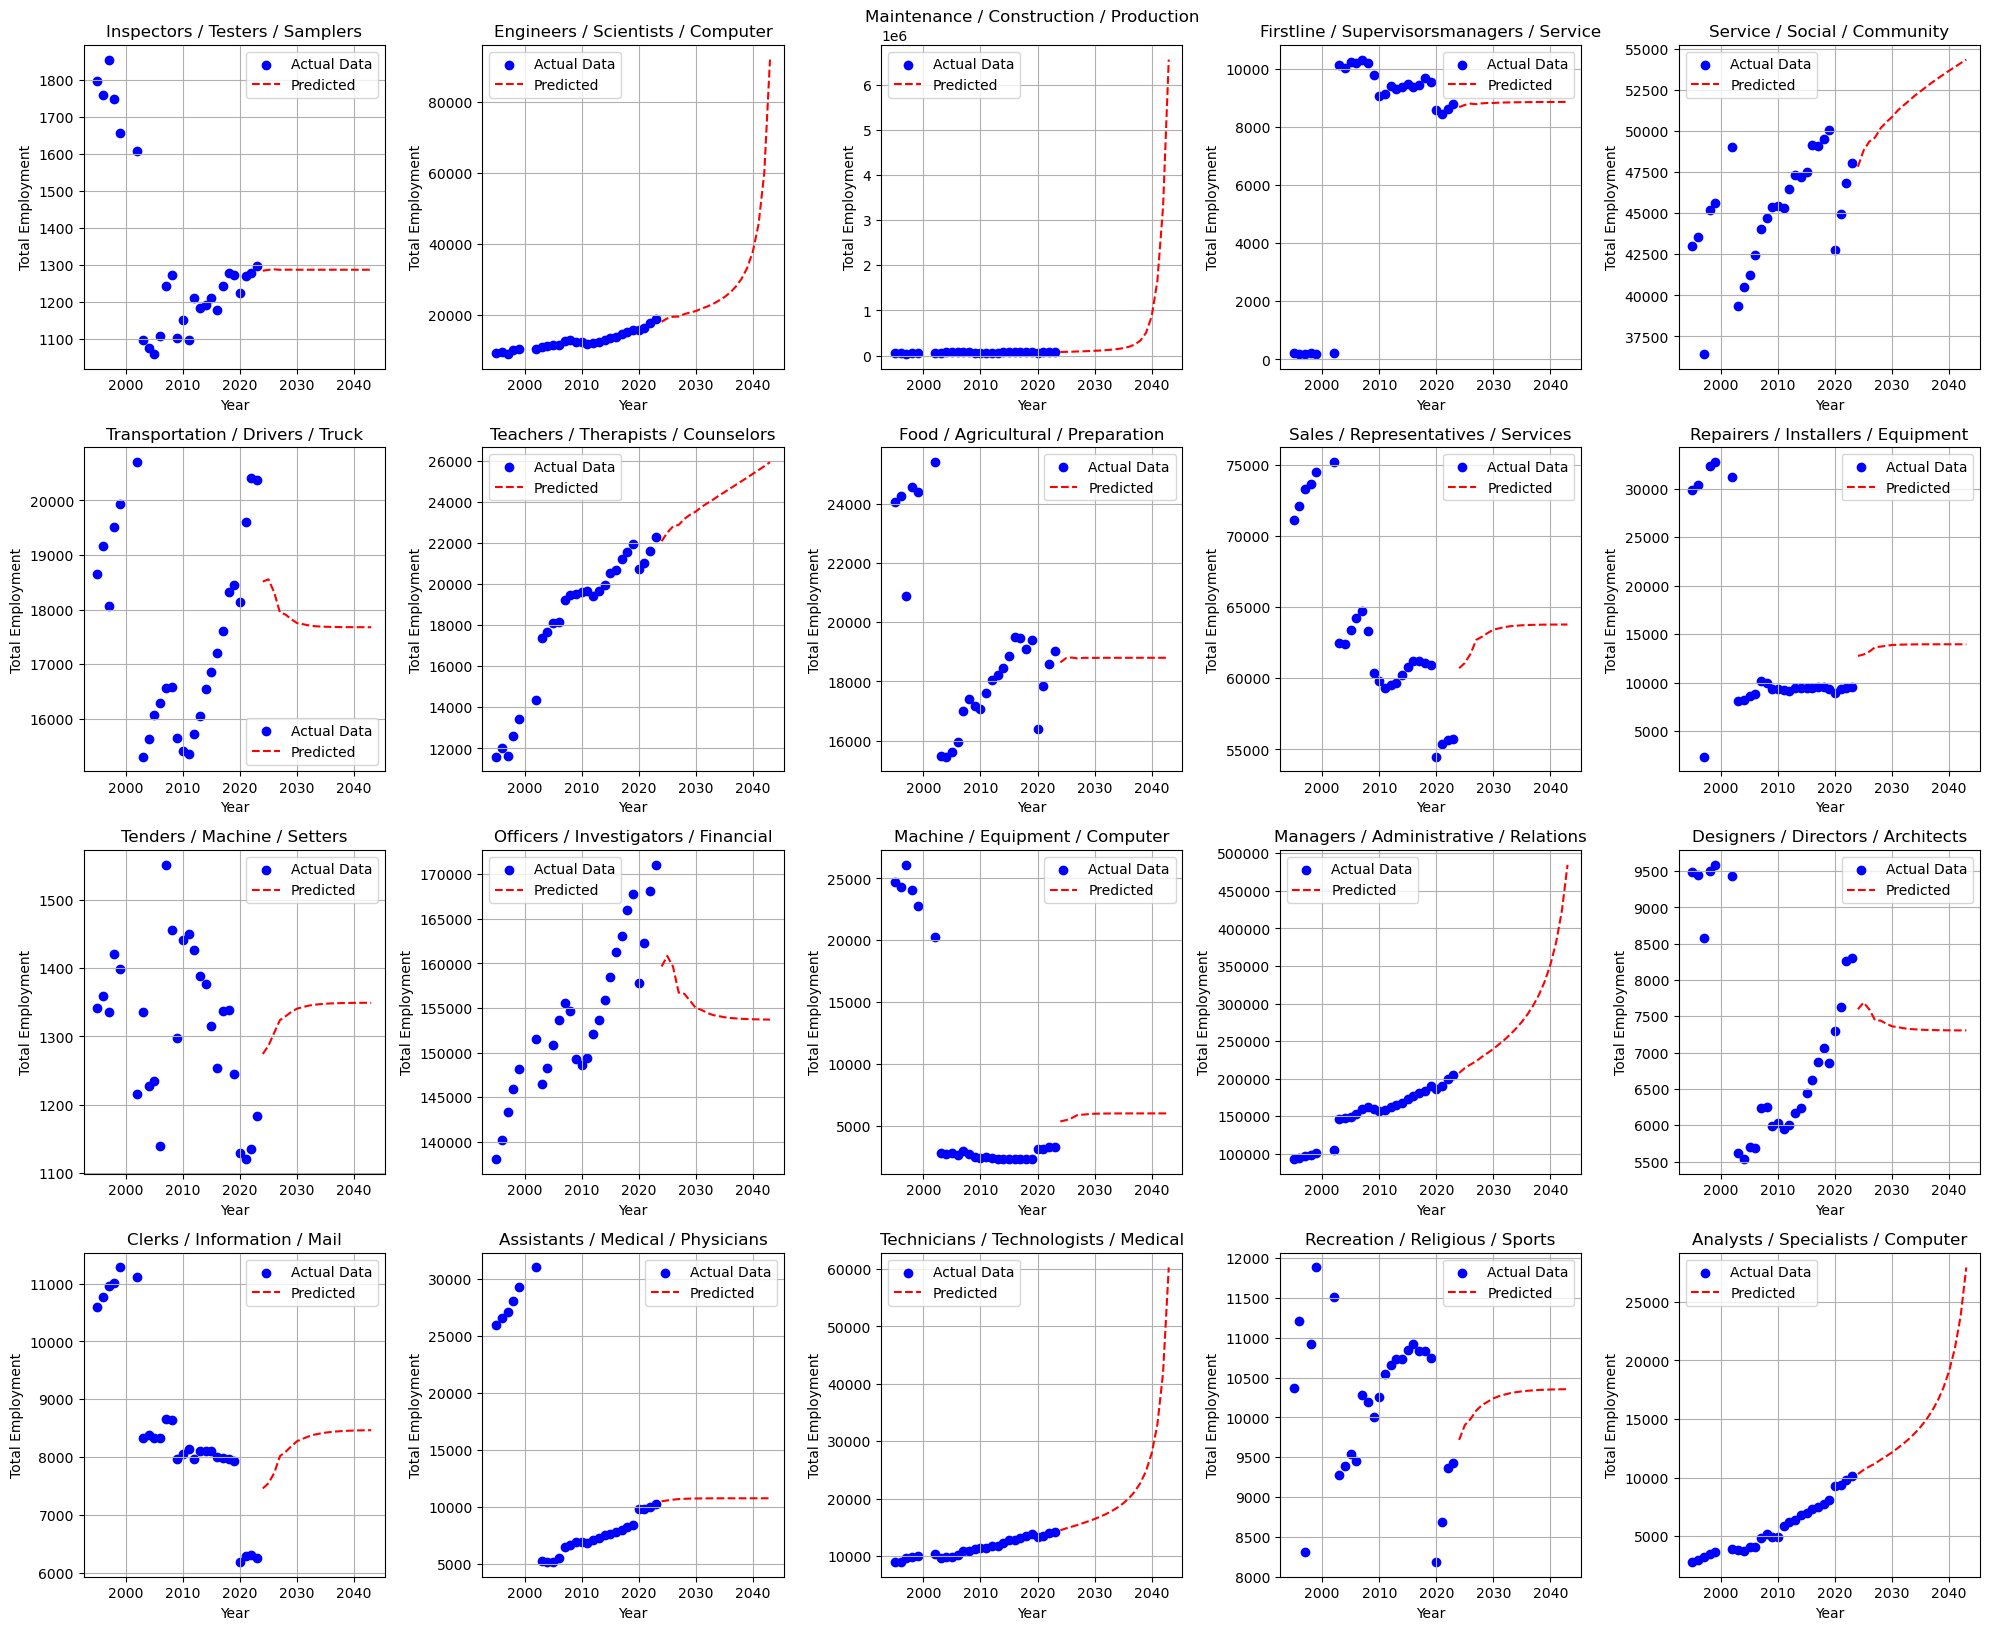

In [ ]:
# Get unique clusters
unique_clusters = cluster_trend["Cluster"].unique()
num_clusters = len(unique_clusters)

# Set up grid size for plots (5x5)
grid_size = (5, 5)
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))
axes = axes.flatten()

# Loop through each cluster and train an LSTM model
for i, cluster_id in enumerate(unique_clusters):
    if i >= grid_size[0] * grid_size[1]:  # Ensure we don't exceed the grid size
        break

    # Get data for the current cluster
    cluster_data = cluster_trend[cluster_trend["Cluster"] == cluster_id][["Year", "Total Employed"]]

    # Skip clusters with too few data points
    if len(cluster_data) < 5:
        continue

    # Prepare data for LSTM
    X = cluster_data["Year"].values.reshape(-1, 1)
    Y = cluster_data["Total Employed"].values.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    Y_scaled = scaler.fit_transform(Y)

    # Create sequences for LSTM
    def create_sequences(Y, time_steps=3):
        Xs, Ys = [], []
        for i in range(len(Y) - time_steps):
            Xs.append(Y[i:i+time_steps])
            Ys.append(Y[i+time_steps])
        return np.array(Xs), np.array(Ys)

    time_steps = 3
    X_seq, Y_seq = create_sequences(Y_scaled, time_steps)

    # Skip clusters with too little data for training
    if len(X_seq) == 0:
        continue

    # Define LSTM model with explicit Input layer
    model = Sequential([
        Input(shape=(time_steps, 1)),  # Explicit input definition
        LSTM(50, activation='relu', return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(X_seq, Y_seq, epochs=50, verbose=0)

    # Predict next 20 years
    future_years = np.arange(2024, 2044).reshape(-1, 1)
    future_predictions = []

    # Use last known data to predict the next years iteratively
    last_known_values = Y_scaled[-time_steps:].reshape(1, time_steps, 1)
    for _ in range(20):
        pred = model.predict(last_known_values, verbose=0)
        future_predictions.append(pred[0, 0])
        last_known_values = np.roll(last_known_values, -1)
        last_known_values[0, -1, 0] = pred[0, 0]

    # Rescale predictions back to original values
    future_values = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).reshape(-1)

    # Plot actual data and predictions
    axes[i].scatter(X, Y, color='blue', label="Actual Data")
    axes[i].plot(future_years, future_values, color='red', linestyle="dashed", label="Predicted")

    # Use cluster name instead of cluster number
    cluster_name = cluster_names.get(cluster_id, f"Cluster {cluster_id}")
    axes[i].set_title(cluster_name)

    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Total Employment")
    axes[i].legend()
    axes[i].grid()

# Remove empty subplots if there are fewer clusters than grid cells
for j in range(i + 1, grid_size[0] * grid_size[1]):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


After running the Linear Regression and LSTM models, we will utilize the data to determine which fields are recommended for employment and which are not, based on our analysis. We will implement a classification model that processes existing data and categorizes job clusters as follows:  

- **Recommended**: Clusters exhibiting a significant growth of more than 5%.  
- **Moderately Recommended**: Clusters with a growth rate of less than 5%, indicating moderate expansion.  
- **Slightly Recommended**: Clusters experiencing a slight decline in employment, not exceeding a 5% decrease.  
- **Not Recommended**: Clusters showing a significant employment decline of more than 5%.  

This classification will provide insights into employment trends and aid in informed career decision-making.

In [ ]:
# Define thresholds for classification
GROWTH_THRESHOLD = 0.05  # 5% growth is considered strong
DECLINE_THRESHOLD = -0.05  # More than 5% decline is considered not recommended

# Prepare lists to store features and labels
features = []
labels = []

# Ensure unique clusters are defined
unique_clusters = cluster_trend["Cluster"].unique()

# Loop through each cluster to extract features
for cluster_id in unique_clusters:
    cluster_data = cluster_trend[cluster_trend["Cluster"] == cluster_id]

    # Ensure data for both 1995 and 2023 exists
    if 1995 in cluster_data["Year"].values and 2023 in cluster_data["Year"].values:
        emp_1995 = cluster_data[cluster_data["Year"] == 1995]["Total Employed"].values[0]
        emp_2023 = cluster_data[cluster_data["Year"] == 2023]["Total Employed"].values[0]
        growth = (emp_2023 - emp_1995) / emp_1995 if emp_1995 != 0 else 0  # Avoid division by zero
    else:
        continue  # Skip clusters without sufficient data

    # Predict employment for the year 2043 using XGBoost
    future_years = np.array(range(2024, 2044)).reshape(-1, 1)
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
    X_train = cluster_data["Year"].values.reshape(-1, 1)
    Y_train = cluster_data["Total Employed"].values
    model.fit(X_train, Y_train)
    emp_2043 = model.predict([[2043]])[0]

    # Compute mean and standard deviation of employment for additional features
    mean_employment = np.mean(Y_train)
    std_employment = np.std(Y_train)

    # Assign a label based on new classification logic
    if growth > GROWTH_THRESHOLD:
        label = "Highly Recommended"  # Strong Growth
    elif 0 <= growth <= GROWTH_THRESHOLD:
        label = "Moderately Recommended"  # Stable but increasing
    elif DECLINE_THRESHOLD < growth < 0:
        label = "Slightly Recommended"  # Mild Decline
    else:
        label = "Not Recommended"  # Strong Decline

    # Append extracted features and labels to lists
    features.append([growth, emp_2023, emp_2043, mean_employment, std_employment])
    labels.append(label)

# Convert data to NumPy arrays
X = np.array(features)
Y = np.array(labels)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Ensure at least two different labels for classification
if len(np.unique(Y_encoded)) < 2:
    print("Warning: Only one class detected in Y. Adjusting the dataset for balance.\n")

    # Add a synthetic example to ensure two different classes exist
    X = np.vstack([X, X[0]])
    Y_encoded = np.append(Y_encoded, (Y_encoded[0] + 1) % len(label_encoder.classes_))

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded)

# Train XGBoost classifier
clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric="mlogloss", random_state=42)
clf.fit(X_train, Y_train)

# Evaluate model accuracy
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display recommendations for each cluster
for i, cluster_id in enumerate(unique_clusters):
    if i >= len(features):
        break
    recommendation = label_encoder.inverse_transform([Y_encoded[i]])[0]
    print(f"Cluster {cluster_names.get(cluster_id, cluster_id)}: {recommendation}")


Model Accuracy: 1.00
Cluster Inspectors / Testers / Samplers: Not Recommended
Cluster Engineers / Scientists / Computer: Highly Recommended
Cluster Maintenance / Construction / Production: Highly Recommended
Cluster Firstline / Supervisorsmanagers / Service: Highly Recommended
Cluster Service / Social / Community: Highly Recommended
Cluster Transportation / Drivers / Truck: Highly Recommended
Cluster Teachers / Therapists / Counselors: Highly Recommended
Cluster Food / Agricultural / Preparation: Not Recommended
Cluster Sales / Representatives / Services: Not Recommended
Cluster Repairers / Installers / Equipment: Not Recommended
Cluster Tenders / Machine / Setters: Not Recommended
Cluster Officers / Investigators / Financial: Highly Recommended
Cluster Machine / Equipment / Computer: Not Recommended
Cluster Managers / Administrative / Relations: Highly Recommended
Cluster Designers / Directors / Architects: Not Recommended
Cluster Clerks / Information / Mail: Not Recommended
Cluster A

Let's slightly adjust the threshold percentage that categorizes the fields and observe whether there are any changes in the recommendations as well as in the model's accuracy.

In [ ]:
# Define new thresholds for classification
GROWTH_THRESHOLD = 0.10  # 10% growth is considered strong
DECLINE_THRESHOLD = -0.10  # More than 10% decline is considered not recommended

# Prepare lists to store features and labels
features = []
labels = []

# Ensure unique clusters are defined
unique_clusters = cluster_trend["Cluster"].unique()

# Loop through each cluster to extract features
for cluster_id in unique_clusters:
    cluster_data = cluster_trend[cluster_trend["Cluster"] == cluster_id]

    # Ensure data for both 1995 and 2023 exists
    if 1995 in cluster_data["Year"].values and 2023 in cluster_data["Year"].values:
        emp_1995 = cluster_data[cluster_data["Year"] == 1995]["Total Employed"].values[0]
        emp_2023 = cluster_data[cluster_data["Year"] == 2023]["Total Employed"].values[0]
        growth = (emp_2023 - emp_1995) / emp_1995 if emp_1995 != 0 else 0  # Avoid division by zero
    else:
        continue  # Skip clusters without sufficient data

    # Predict employment for the year 2043 using XGBoost
    future_years = np.array(range(2024, 2044)).reshape(-1, 1)
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
    X_train = cluster_data["Year"].values.reshape(-1, 1)
    Y_train = cluster_data["Total Employed"].values
    model.fit(X_train, Y_train)
    emp_2043 = model.predict([[2043]])[0]

    # Compute mean and standard deviation of employment for additional features
    mean_employment = np.mean(Y_train)
    std_employment = np.std(Y_train)

    # Assign a label based on new classification logic
    if growth > GROWTH_THRESHOLD:
        label = "Highly Recommended"  # Strong Growth (Above 10%)
    elif 0 <= growth <= GROWTH_THRESHOLD:
        label = "Moderately Recommended"  # Stable but increasing (0% to 10% growth)
    elif DECLINE_THRESHOLD < growth < 0:
        label = "Slightly Recommended"  # Mild Decline (up to -10% decline)
    else:
        label = "Not Recommended"  # Strong Decline (More than -10%)

    # Append extracted features and labels to lists
    features.append([growth, emp_2023, emp_2043, mean_employment, std_employment])
    labels.append(label)

# Convert data to NumPy arrays
X = np.array(features)
Y = np.array(labels)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Ensure at least two different labels for classification
unique_classes, class_counts = np.unique(Y_encoded, return_counts=True)
if len(unique_classes) < 2 or np.min(class_counts) < 2:
    print("Warning: Only one class detected in Y or an underrepresented class. Adjusting the dataset for balance.\n")

    # Add synthetic samples to ensure each class has at least two instances
    for cls in unique_classes:
        if class_counts[cls] < 2:
            X = np.vstack([X, X[0]])  # Duplicate a sample from another class
            Y_encoded = np.append(Y_encoded, cls)

# Split data into training and testing sets (without stratify to avoid errors)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Train XGBoost classifier
clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric="mlogloss", random_state=42)
clf.fit(X_train, Y_train)

# Evaluate model accuracy
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display recommendations for each cluster
for i, cluster_id in enumerate(unique_clusters):
    if i >= len(features):
        break
    recommendation = label_encoder.inverse_transform([Y_encoded[i]])[0]
    print(f"Cluster {cluster_names.get(cluster_id, cluster_id)}: {recommendation}")



Model Accuracy: 0.80
Cluster Inspectors / Testers / Samplers: Not Recommended
Cluster Engineers / Scientists / Computer: Highly Recommended
Cluster Maintenance / Construction / Production: Highly Recommended
Cluster Firstline / Supervisorsmanagers / Service: Highly Recommended
Cluster Service / Social / Community: Highly Recommended
Cluster Transportation / Drivers / Truck: Moderately Recommended
Cluster Teachers / Therapists / Counselors: Highly Recommended
Cluster Food / Agricultural / Preparation: Not Recommended
Cluster Sales / Representatives / Services: Not Recommended
Cluster Repairers / Installers / Equipment: Not Recommended
Cluster Tenders / Machine / Setters: Not Recommended
Cluster Officers / Investigators / Financial: Highly Recommended
Cluster Machine / Equipment / Computer: Not Recommended
Cluster Managers / Administrative / Relations: Highly Recommended
Cluster Designers / Directors / Architects: Not Recommended
Cluster Clerks / Information / Mail: Not Recommended
Clus

It appears that the model's accuracy decreased after adjusting the threshold percentage. This change in accuracy is a result of modifying the category definitions, which impacts the distribution of clusters within each group and the balance between categories in the model.  

When we adjusted the threshold from 5% to 10%, it affected the distribution of clusters across different categories and disrupted the category balance within the model, potentially leading to reduced learning effectiveness. It seems that when the category boundaries are clearer (such as at 5%), the model finds it easier to learn and classify accurately. However, when the threshold is raised to 10%, some groups become more similar, making it harder to distinguish between them.

## Open Positions


### About

The landscape of open job positions is constantly evolving, influenced by industry trends, technological advancements, and shifting economic demands. Employers frequently adjust job requirements to align with emerging skills, creating a dynamic correlation between job fields and required qualifications. For example, as automation and AI reshape industries, technical skills such as data analysis and machine learning are becoming essential in roles that previously required only general business expertise. Similarly, soft skills like adaptability and problem-solving are increasingly emphasized across various fields. Understanding these correlations allows job seekers to better position themselves in the market by acquiring in-demand competencies, while organizations can refine hiring strategies to attract top talent.

### Analyze the data

#### Set the current df to analyze

In [5]:
df = pd.read_csv(NY_JOB_POSTINGS)

#### A glance at the data

In [6]:
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,695844,HOUSING PRESERVATION & DVLPMNT,Internal,1,.Net Developer for HPD TECH,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,13632,02,"Technology, Data & Innovation",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,12/31/2024,31-MAR-2025,12/31/2024,01/20/2025
1,688467,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Timekeeper,COMMUNITY ASSOCIATE,Non-Competitive-5,56057,00,Administration & Human Resources,...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,11/18/2024,NaN,11/18/2024,01/20/2025
2,692867,DEPT OF HEALTH/MENTAL HYGIENE,External,2,"Public Health Inspector, Bureau of Food Safety...",PUBLIC HEALTH SANITARIAN,Competitive-1,31215,01,"Health Public Safety, Inspections, & Enforcement",...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,12/11/2024,11-DEC-2025,12/11/2024,01/20/2025
3,545587,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Senior Stationary Engineer Electric,SENIOR STATIONARY ENGINEER (EL,Competitive-1,91639,00,Building Operations & Maintenance,...,Appointments are subject to OMB approval; For ...,Click the Apply Now button.,NaN,NaN,NaN,New York City residency is generally required ...,08/12/2022,NaN,08/12/2022,01/20/2025
4,552760,DEPT OF ENVIRONMENT PROTECTION,Internal,2,MECHANICAL ENGINEERING INTERN,MECHANICAL ENGINEERING INTERN,Competitive-1,20403,00,"Engineering, Architecture, & Planning",...,Appointments are subject to OMB approval. For...,Click Apply Now button,35 hours per week/day,"96-05 Horace Harding Expway, 2nd Floor, Corona...",NaN,New York City Residency is not required for th...,10/14/2022,NaN,10/14/2022,01/20/2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859,691838,CAMPAIGN FINANCE BOARD,Internal,1,DEPUTY CHIEF PEOPLE OFFICER - PEOPLE & CULTURE,ASSOCIATE EXECUTIVE PROGRAM MA,Pending Classification-2,06939,M3,"Administration & Human Resources Policy, Resea...",...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,12/16/2024,NaN,12/16/2024,01/20/2025
5860,695400,DEPT OF DESIGN & CONSTRUCTION,External,1,Chief,CONSTRUCTION PROJECT MANAGER,Competitive-1,34202,03,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,01/02/2025,NaN,01/02/2025,01/20/2025
5861,691612,OFF OF PAYROLL ADMINISTRATION,Internal,1,Legal Administrative Coordinator,ADM MANAGER-NON-MGRL FRM M1/M2,Competitive-1,1002C,01,Legal Affairs,...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,12/05/2024,NaN,12/05/2024,01/20/2025
5862,639840,DEPT OF ENVIRONMENT PROTECTION,External,1,EHS Training Specialist,ADMINISTRATIVE STAFF ANALYST (,Competitive-1,1002A,00,"Engineering, Architecture, & Planning Policy, ...",...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,07/30/2024,NaN,07/30/2024,01/20/2025


#### Numeric values analysis

In [ ]:
df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,5864.000000,5864.000000,5864.000000,5864.000000,0.0
mean,647158.840382,2.382503,65766.054307,91444.846538,NaN
std,46342.849296,8.617094,32161.253648,49908.584658,NaN
min,469953.000000,1.000000,0.000000,15.450000,NaN
25%,626210.000000,1.000000,53702.000000,65231.500000,NaN
50%,644837.000000,1.000000,64242.000000,86894.500000,NaN
75%,689230.000000,1.000000,81083.000000,115854.000000,NaN
max,699036.000000,150.000000,231092.000000,276600.000000,NaN


###### Graphs values

In [ ]:
param_to_check = 'Salary Range To'

###### Frequency graph

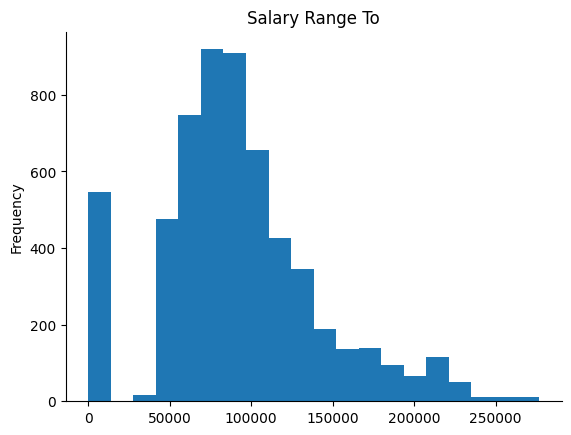

In [ ]:
df[param_to_check].plot(kind='hist', bins=20, title=param_to_check)
plt.gca().spines[['top', 'right',]].set_visible(False)

###### Frequency graph based on param 2

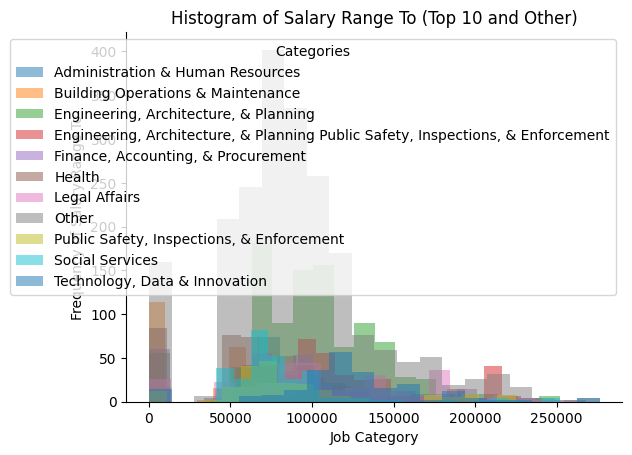

In [ ]:
second_param = 'Job Category'
n_top = 10
top_categories = df[second_param].value_counts().nlargest(n_top).index

# Create a new column grouping by top categories and "Other"
df['grouped_var'] = df[second_param].where(df[second_param].isin(top_categories), 'Other')

# Plot histogram for each group
for label, group in df.groupby('grouped_var'):
    group[param_to_check].plot(
        kind='hist',
        bins=20,
        alpha=0.5,
        label=str(label)
    )

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title(f"Histogram of {param_to_check} (Top {n_top} and Other)")
plt.xlabel(second_param)
plt.ylabel(f"Frequency of {param_to_check}")
plt.legend(title="Categories")
plt.show()



##### Frequency graph Career level

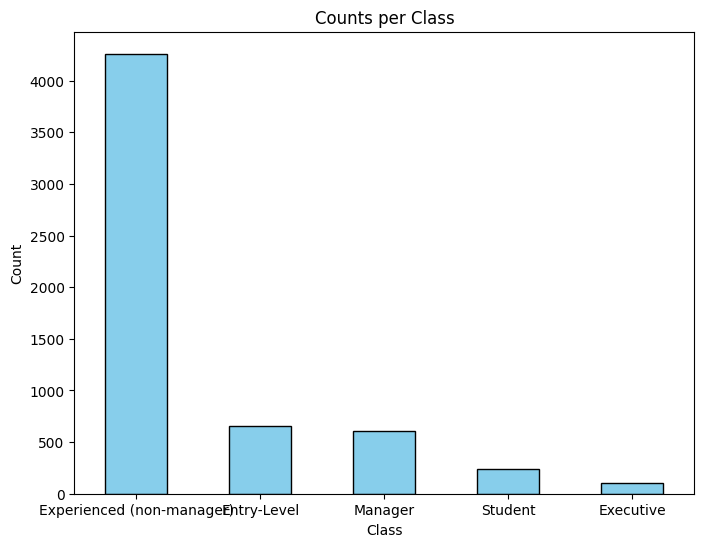

In [ ]:
param_to_show = 'Career Level'

class_counts = df[param_to_show].value_counts()

# Plot the count of each class
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Counts per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()

#### Text values analysis

In [ ]:
df.describe(include=[object])

,Agency,Posting Type,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,...,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
count,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,...,3626,2718,3647,1401,1716,5864,5864,1868,5864,5864
unique,64,2,1969,382,5,401,19,183,2,5,...,1542,617,919,232,237,68,540,238,501,1
top,DEPT OF ENVIRONMENT PROTECTION,Internal,ASSISTANT PROJECT MANAGER,COMMUNITY COORDINATOR,Competitive-1,56058,00,"Engineering, Architecture, & Planning",F,Experienced (non-manager),...,Candidates should have at least six years of e...,Appointments are subject to OMB approval. For...,Click Apply Now Button,35 Hours,55 Water St Ny Ny,New York City residency is generally required ...,12/31/2024,28-FEB-2025,12/31/2024,01/20/2025
freq,1239,2958,122,354,3821,354,2376,990,5570,4261,...,24,110,212,229,199,3081,146,90,140,5864


#### Set the current df to analyze

In [ ]:
df = pd.read_csv(NY_JOB_POSTINGS)

### Models

#### Transform the data


In [7]:
encoder = LabelEncoder()
cols_to_transform = ['Career Level', 'Title Classification']
for col in cols_to_transform:
  df[f'encoded_{col}'] = encoder.fit_transform(df[col])

features = df[[f'encoded_{col}' for col in cols_to_transform]]
target = df['Salary Range To']


#### Split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"Train rows: {len(X_train)}, Test rows: {len(X_test)}")

Train rows: 4691, Test rows: 1173


#### Linear regression

##### Train

In [9]:

# Create a logistic regression model
model = LinearRegression()
print(X_train, y_train)

# Train the model
model.fit(X_train, y_train)


      encoded_Career Level  encoded_Title Classification
5048                     2                             0
2851                     3                             3
210                      1                             3
2351                     2                             3
5563                     2                             0
...                    ...                           ...
3772                     2                             0
5191                     2                             3
5226                     2                             3
5390                     2                             1
860                      2                             0

[4691 rows x 2 columns] 5048     96395.00
2851    228190.00
210     175000.00
2351    103055.00
5563        53.58
          ...    
3772     68099.00
5191     56650.00
5226     94521.00
5390    175100.00
860      69243.00
Name: Salary Range To, Length: 4691, dtype: float64


LinearRegression()

##### Predict

MAE: 36215.50
MSE: 2381789652.88
RMSE: 48803.58
R²: 0.03


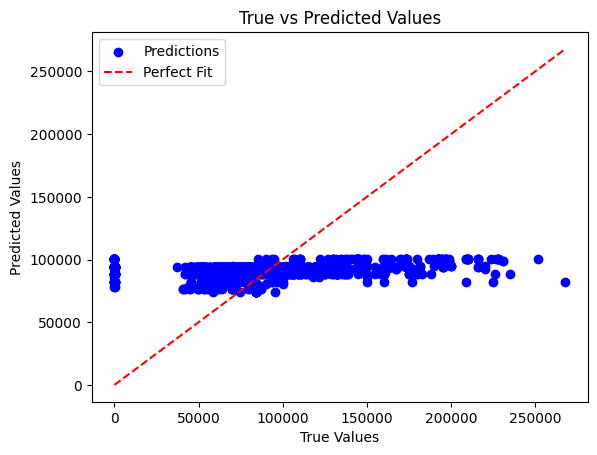

In [14]:

# Make predictions
y_pred = model.predict(X_test)

# 1. Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 2. Plot predictions vs true values
plt.scatter(y_test, y_pred, label="Predictions", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

## Occupations paths

#### About

Navigating the optimal career path is a complex challenge, as individuals must align their aspirations, abilities, and experiences with the ever-evolving job market.Traditional methods of career planning often rely on personal intuition or generic advice, leading to suboptimal choices. However, with advancements in machine learning and large language models (LLMs), we can develop intelligent systems that analyze vast datasets, personal preferences, and industry trends to recommend the most suitable career paths. By leveraging AI-driven models, individuals can receive tailored guidance, identifying the most efficient route to their desired profession while considering skill gaps, market demand, and potential growth opportunities.

#### Current work

We just started to work on scraping the web source in order to get a lot of textual data. The mission is to use this data in order to train specific field llm.

#### The Scraper

##### About

Scraping data about occupations and suggested career paths, degree status, and more.

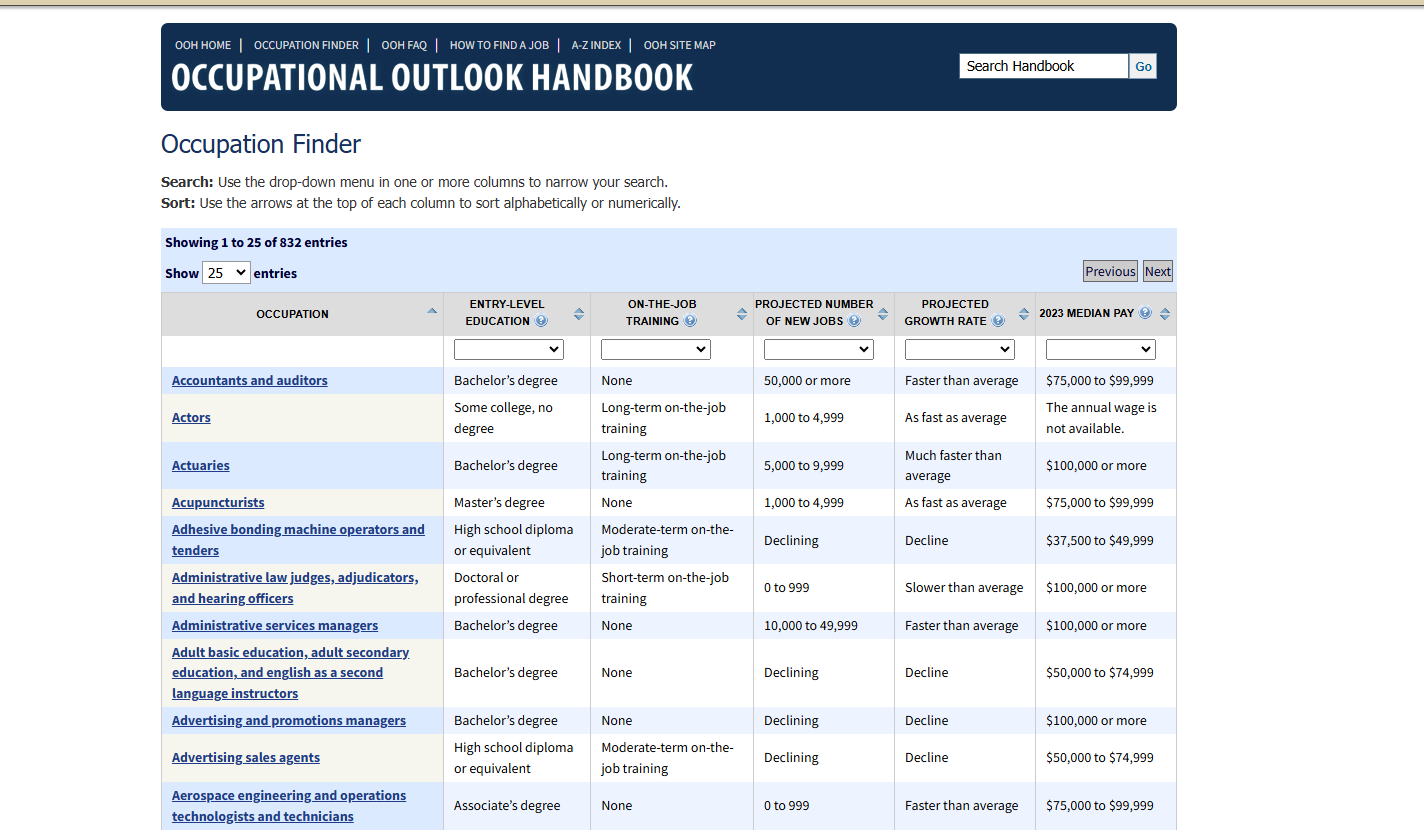

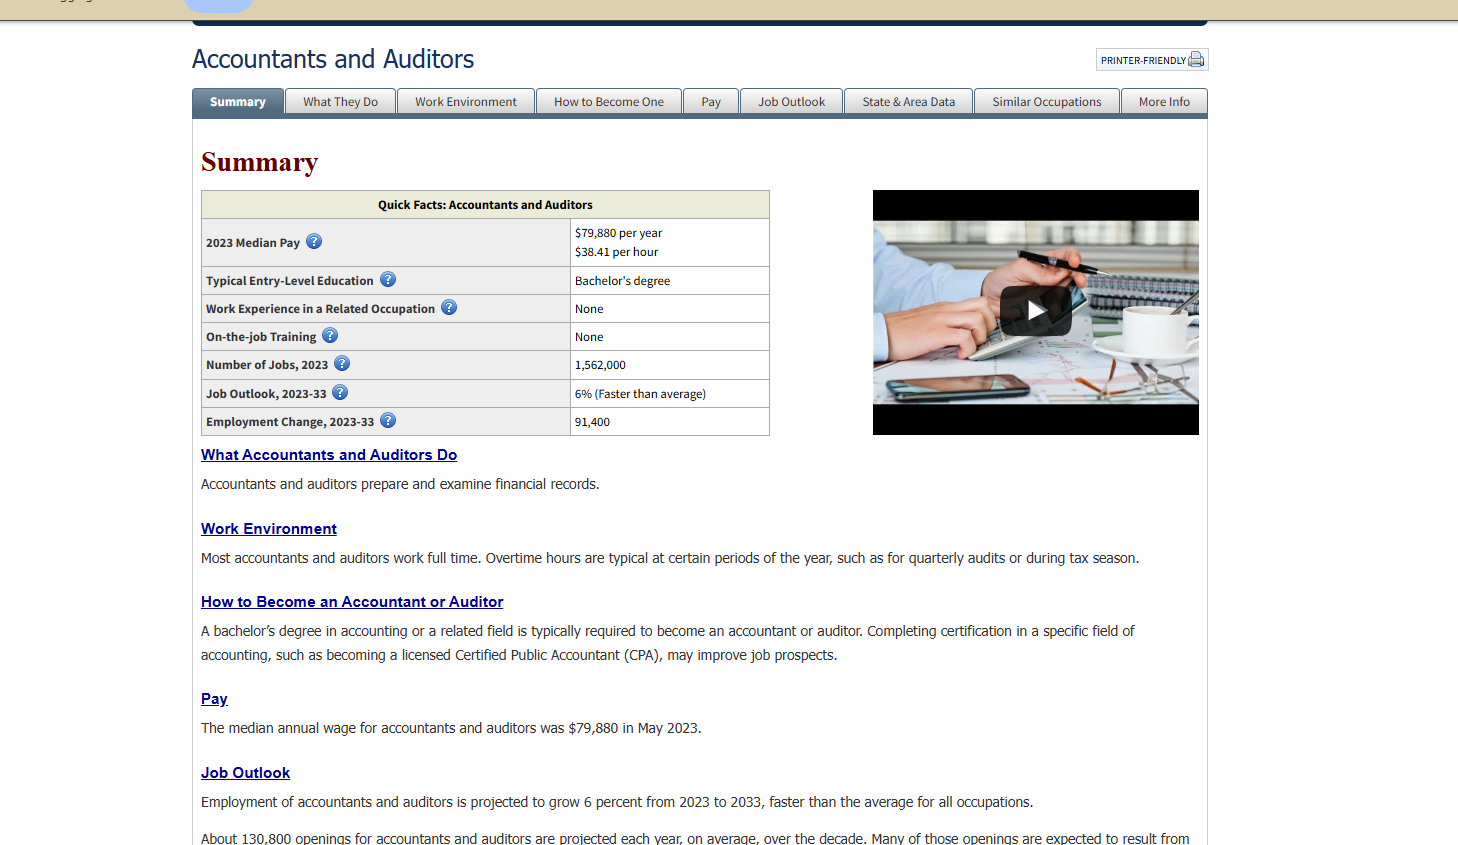

##### Code

###### Utils

In [ ]:
def save_to_csv(data_list: List[Dict], filename: str):
    with open(filename, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=list(data_list[0].keys()))

        writer.writeheader()  # Write CSV header
        writer.writerows(data_list)


def add_to_csv(data_list: List[Dict], filename: str):
    with open(filename, mode="a", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=list(data_list[0].keys()))
        writer.writerows(data_list)

##### Generic parser

In [ ]:
from abc import ABC, abstractmethod

import requests
from bs4 import BeautifulSoup


class Scraper(ABC):
    HEADERS = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

    def __init__(self):
        self.response: requests.Response | None = None
        self.soup: BeautifulSoup | None = None
        self.url: str | None = None

    def load_soup_on_url(self, url: str):
        self.url = url
        self.response = requests.get(url, headers=self.HEADERS)
        if self.response.status_code != 200:
            print(f"Failed to retrieve page: {self.response.status_code}")
            return None

        self.soup = BeautifulSoup(self.response.text, "html.parser")

    @abstractmethod
    def run_logic(self) -> dict:
        pass


##### Models

In [ ]:
from typing import Dict, List

from pydantic import BaseModel


class Occupation(BaseModel):
    name: str
    facts: Dict[str, str]
    extra_info: Dict[str, str]
    how_to_become_one_data: Dict[str, str]

    def get_facts_dict(self) -> Dict[str, str]:
        return self.facts | {'Occupation': self.name}

    def get_how_to_become_one_dict(self) -> Dict[str, str]:
        return self.how_to_become_one_data | {'Occupation': self.name}


##### BLS Parser

In [ ]:
from typing import Dict


class BLSOccupationScraper(Scraper):

    def get_all_occupations(self):
        occupations = {}
        occ_table = self.soup.find("table", id="occfinder")
        if occ_table:
            for td in occ_table.find_all("tr"):
                if not td:
                    continue

                a_tag = td.find("a")
                if a_tag:
                    occupation_name = a_tag.get_text(strip=True)
                    occupation_link = f"https://www.bls.gov{a_tag['href']}" if a_tag.get("href") else "No link"
                    if not occupation_name or not occupation_link:
                        continue
                    occupations[occupation_name] = occupation_link
        return occupations

    def get_facts(self):
        quick_facts = {}
        table = self.soup.find("table", id="quickfacts")
        if table:
            for row in table.find_all("tr"):
                cols = row.find_all("th") + row.find_all("td")
                if len(cols) == 2:
                    key = cols[0].get_text(strip=True)
                    value = cols[1].get_text(strip=True)
                    quick_facts[key.strip()] = value
        return quick_facts

    def get_summary_free_text_sections(self):
        extra_info = {}
        for title in self.soup.find_all("h3"):
            title_text = title.get_text().strip()
            section = title.find_next_sibling("p")
            if section:
                extra_info[title.get_text().strip()] = section.get_text(strip=True)

            if title_text == "Similar Occupations":
                break

        return extra_info

    def get_similar_occupations(self):
        similar_occupations = []
        occupations_table = self.soup.find("table", id="similar-occupations")
        if occupations_table:
            for row in occupations_table.find_all("tr")[1:]:  # Skip header row
                occupation = row.find_all("td")[1].get_text(strip=True)
                similar_occupations.append(occupation)

        return ','.join(similar_occupations)

    def how_to_become_one_data(self):
        become_one_data = {}
        become_one_section = self.soup.find("div", id="tab-4")
        columns_to_write = ["education", "experience",
                            "license", "advancement", "qualities"
                            ]

        if not become_one_section:
            return {}

        headings = become_one_section.find_all(["h3", "p"])
        for column in columns_to_write:
            current_heading = None
            for tag in headings:
                if tag.name == "h3":
                    current_heading = tag.get_text(strip=True).lower()
                    if column not in current_heading:
                        continue

                    become_one_data[column] = ""
                elif tag.name == "p" and current_heading and column in current_heading:
                    become_one_data[column] += tag.get_text(strip=True) + "\n"
                    break

            if column not in become_one_data:
                become_one_data[column] = ""

        return become_one_data

    def get_occupation(self):
        return self.url.split("/")[-1]

    def run_logic(self) -> Dict:
        facts = self.get_facts() | {"similar_occupations": self.get_similar_occupations()}
        how_to_become_one = self.how_to_become_one_data()
        if 'data-for-occupations-not-covered-in-detail' in self.get_occupation():
            return {}

        return {
            "facts": facts,
            "extra_info": self.get_summary_free_text_sections(),
            "how_to_become_one_data": how_to_become_one
        }


##### Main

In [ ]:
import os.path
from typing import List, Dict

from tqdm import tqdm

OCCUPATION_POOL_URL = 'https://www.bls.gov/ooh/occupation-finder.htm?pay=&education=&training=&newjobs=&growth=&submit=GO'
OCCUPATIONS_URLS_CSV = 'occupations_urls.csv'
OCCUPATIONS_FACTS_CSV = 'occupations_facts.csv'
OCCUPATIONS_HOW_TO_BECOME_ONE_CSV = 'occupations_how_to_become_one.csv'


def extract_occupations_urls(pool_url: str, filename: str):
    occupation_scraper = BLSOccupationScraper()
    occupation_scraper.load_soup_on_url(url=pool_url)
    occupations_urls = occupation_scraper.get_all_occupations()
    save_to_csv([{'name': key, 'url': value} for key, value in occupations_urls.items()], filename)
    return occupations_urls


def extract_occupations_data(urls_occupations: Dict[str, str], facts_path: str, how_to_become_one_path: str):
    scraper = BLSOccupationScraper()
    for occupation_name, url in tqdm(urls_occupations.items()):
        scraper.load_soup_on_url(url=url)
        scraper_occupation_result = scraper.run_logic()
        if not scraper_occupation_result:
            continue

        scraper_occupation_result['name'] = occupation_name
        occupation = Occupation(**scraper_occupation_result)

        if not os.path.exists(OCCUPATIONS_FACTS_CSV):
            save_to_csv([occupation.get_facts_dict()], facts_path)
        else:
            add_to_csv([occupation.get_facts_dict()], facts_path)
        if not os.path.exists(OCCUPATIONS_HOW_TO_BECOME_ONE_CSV):
            save_to_csv([occupation.get_how_to_become_one_dict()], how_to_become_one_path)
        else:
            add_to_csv([occupation.get_how_to_become_one_dict()], how_to_become_one_path)


def main():
    print("Extracting occupations urls...")
    occupations_urls = extract_occupations_urls(pool_url=OCCUPATION_POOL_URL, filename=OCCUPATIONS_URLS_CSV)
    print("Extracting occupations facts...")
    extract_occupations_data(urls_occupations=occupations_urls, facts_path=OCCUPATIONS_FACTS_CSV, how_to_become_one_path=OCCUPATIONS_HOW_TO_BECOME_ONE_CSV)


if __name__ == '__main__':
    main()


#### The LLM

Coming soon .....